In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [6]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

In [7]:
print("Tensorflow Version ::",tf.__version__)
print("Keras version ::",tf.keras.__version__)

Tensorflow Version :: 2.18.0
Keras version :: 3.8.0


#Load The Dataset

In [8]:
heart_disease_df=pd.read_csv('https://raw.githubusercontent.com/GauravSisodia/Keras-Course/main/heart_disease.csv')

In [9]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart_disease_df.shape

(303, 14)

In [11]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Prepare the dataset

In [13]:
type(heart_disease_df)

pandas.core.frame.DataFrame

In [14]:
x=heart_disease_df.drop('target',axis=1)
y=heart_disease_df['target']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape,x_test.shape

((242, 13), (61, 13))

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Building a Binary Classification Neural Network

## Steps to build a neural network using keras

1.Defining and creating a neural network

2.Compile a neural network

3.Training a neural network

4.Evaluate a trained neural network

5.Predictions using a trained neural network


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [22]:
#Building the model
#Defining the Sequential model
model=Sequential()

#Adding Input Layer and passing number of features to it
input_dims=x_train.shape[1]
model.add(tf.keras.Input(shape=(input_dims,),name='input_layer'))
# Adding 3 Dense Layers one by one with activation functions
#model.add(Dense(32,activation='relu',input_shape=(input_dims),name='hidden_layer_1'))
model.add(Dense(32,activation='relu',name='hidden_layer_1')) #input_shape=(input_dims)
model.add(Dense(16,activation='relu',name='hidden_layer_2'))
model.add(Dense(8,activation='relu',name='hidden_layer_3'))

# Adding an output layer
model.add(Dense(1,activation='sigmoid',name='output_layer'))


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

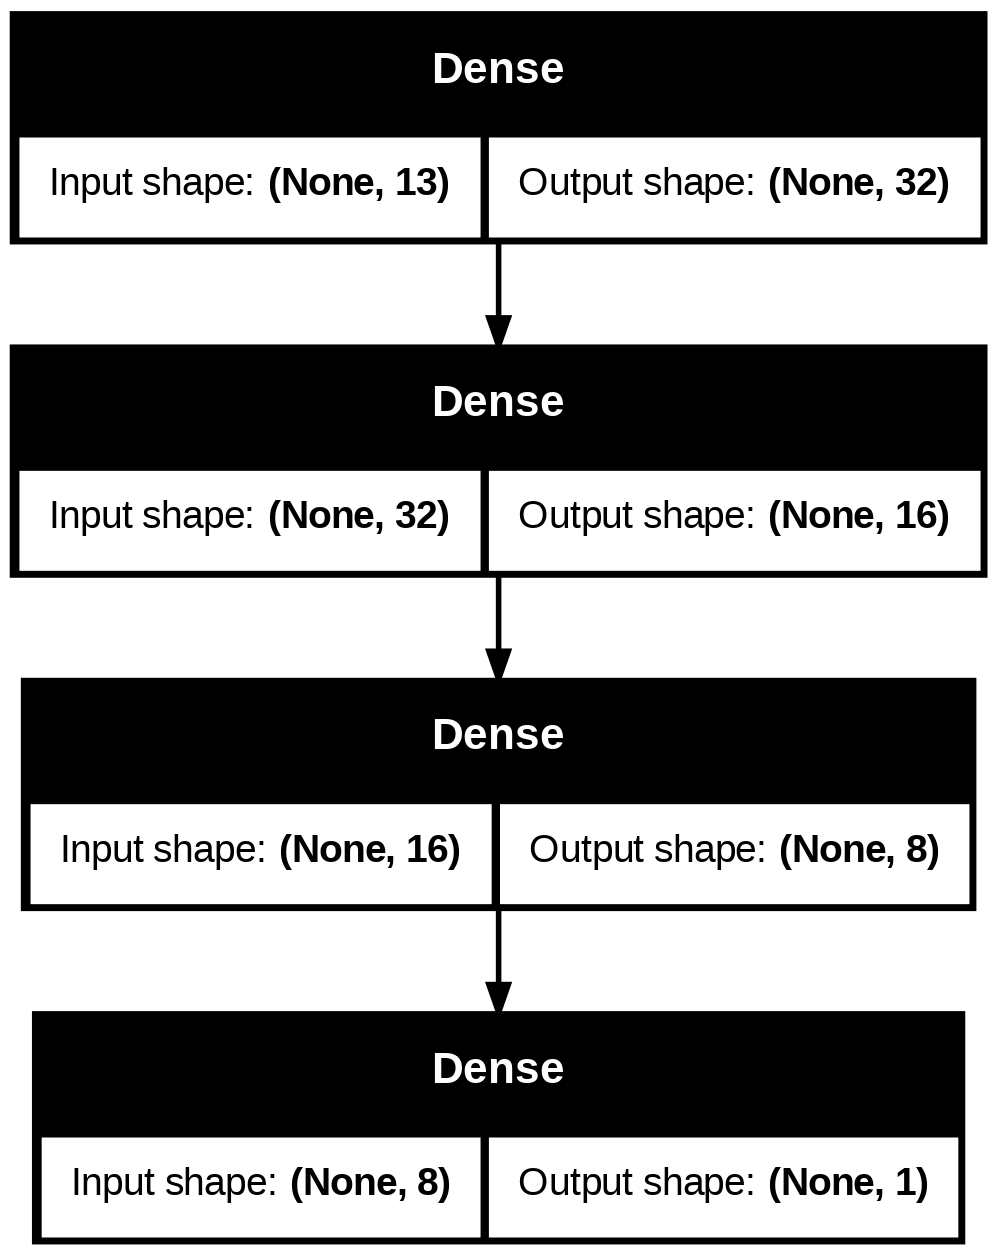

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [25]:
#Import the optimizer
from tensorflow.keras.optimizers import RMSprop

#Define the optimizer
optimizer=RMSprop(learning_rate=0.001) #Here, we have set out learning rate as 0.001

#Compile the model
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [26]:
#Training a neural network

#define the batch size and number of epochs
batch_size=128 #batch_size should always be in the form of 2^n where n=1,2,3,4............
num_epochs=20


#Fit a neural network or train a neural network
multiclass_classifier=model.fit(x_train,y_train,validation_split=0.2,epochs=num_epochs,batch_size=batch_size,verbose=1)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.4576 - loss: 7.5504 - val_accuracy: 0.6327 - val_loss: 0.5702
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6194 - loss: 0.9430 - val_accuracy: 0.7347 - val_loss: 0.8093
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6254 - loss: 1.0099 - val_accuracy: 0.7143 - val_loss: 0.7200
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6592 - loss: 0.8116 - val_accuracy: 0.6939 - val_loss: 0.6311
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6116 - loss: 0.8501 - val_accuracy: 0.6735 - val_loss: 0.6010
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6350 - loss: 0.7491 - val_accuracy: 0.6939 - val_loss: 0.6184
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6514 - loss: 0.7605 - val_accuracy: 0.6327 - val_loss: 0.6204
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6324 - loss: 0.7901 - val_accuracy: 0.4898 - val_loss: 0.7

In [28]:
# Evaluating our neural network using test dataset

score = model.evaluate(x=x_test,y=y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.7231163382530212
Test Accuracy: 0.6229507923126221


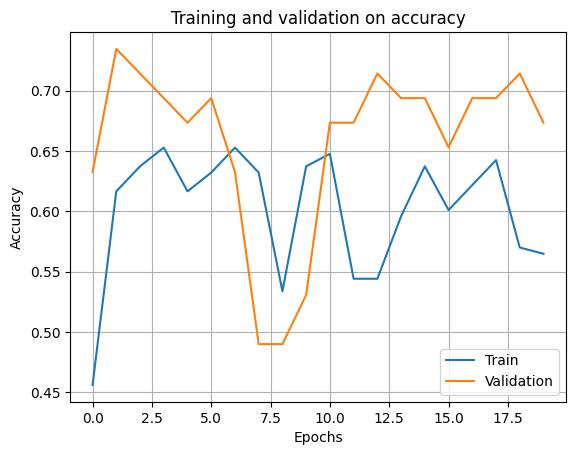

In [29]:
#Plot training accuracy and validation accuracy
plt.plot(multiclass_classifier.history['accuracy'])
plt.plot(multiclass_classifier.history['val_accuracy'])
plt.title('Training and validation on accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

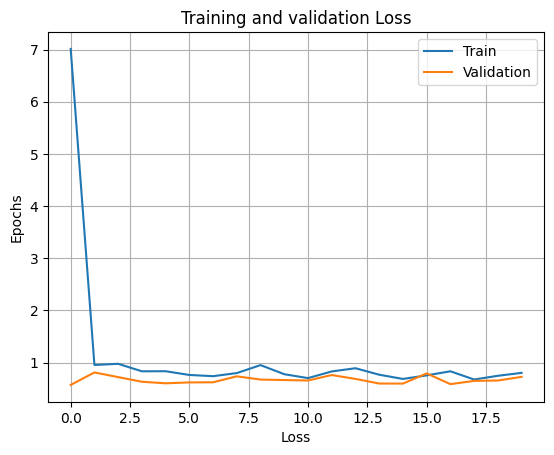

In [30]:
# Plot training loss and validation loss
plt.plot(multiclass_classifier.history['loss'])
plt.plot(multiclass_classifier.history['val_loss'])
plt.title('Training and validation Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [31]:
# predictions on test dataset using predict() function
y_pred = model.predict(x_test)
y_pred[:10]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[0.4989528 ],
       [0.75848156],
       [0.54342014],
       [0.3420351 ],
       [0.8919906 ],
       [0.6737383 ],
       [0.8674927 ],
       [0.04565277],
       [0.87921   ],
       [0.88513243]], dtype=float32)

In [32]:
# Decision Boundary Threshold, if probability > 0.5 then heart disease is present else heart disease is not present
y_pred=(y_pred>0.5)
y_pred[:10]

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True]])

# Plot a Confusion Matrix and Classification Report

In [34]:
# Import libraries for plotting Confusion Matrix and classification Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
import seaborn as sns

In [43]:
# This function plots the confusion matrices given y_i, y_i_hat

def plot_confusion_matrix(y_test,y_predict):
  cm=confusion_matrix(y_test,y_predict)
  labels=['Not Present','Present']

  # Color Map
  cmap=sns.light_palette('blue')

  #Plot Confusion Matrix
  plt.figure(figsize=(4,4))
  sns.heatmap(cm,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Confusion Matrix')
  plt.show()

  print()
  print('-'*100)
  print('Classification Report:\n',classification_report(y_test,y_predict))
  print('Accuracy Score:' + str(accuracy_score(y_test,y_predict)*100))
  fpr,tpr,threshlods=roc_curve(y_test,y_predict)
  print('AUC Score:', auc(fpr,tpr))

In [44]:
# check shape of test dataset
y_test.shape

(61,)

In [45]:
y_test.value_counts()

,count
target,
1,32
0,29


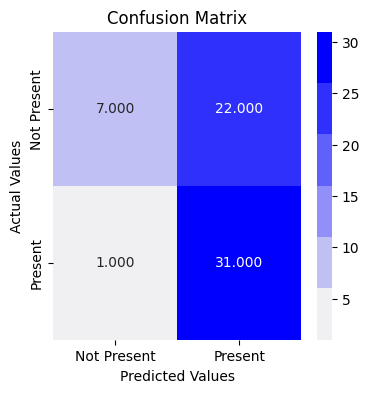


----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.24      0.38        29
           1       0.58      0.97      0.73        32

    accuracy                           0.62        61
   macro avg       0.73      0.61      0.55        61
weighted avg       0.72      0.62      0.56        61

Accuracy Score:62.295081967213115
AUC Score: 0.6050646551724138


In [46]:
plot_confusion_matrix(y_test,y_pred)

In [48]:
import pandas as pd
dates=['2017-01-05', 'Jan 5, 2017','01/05/2017', '2017.01.05','2017/01/05','20170105']
pd.to_datetime(dates,format='mixed')

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)